# (PISA 2012)

## by (Ammar Shaalan)

## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.
Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Investigation Overview

> > iam interseted in seein the influence of gender,Parents' existence at home and a homogenous or heterogenous family background in student's perform in math, reading and science. 
>Also iam carious about which countries have students with exceptionally high literacy scores
>and relation between three subjects



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('pisa_data_clean.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (TOP 95th PERCENTILE IN Three Subjects)

> Notice how as the top nth percentile increases, the gender gap increases as well. In math and science, males are higher than females in number of excellent students, while females are better in reading.



In [12]:
df_95math=df[df['Math Score']>=df['Math Score'].quantile(.95)]
df_95reading=df[df['Reading Score']>=df['Reading Score'].quantile(.95)]
df_95science=df[df['Science Score']>=df['Science Score'].quantile(.95)]
color_set = ['#66b3ff','#ff9999']
color_set2 = ['#ff9999','#66b3ff']




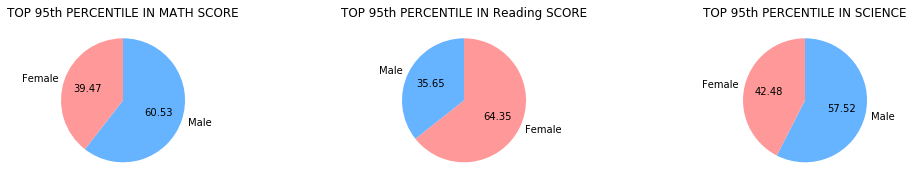

In [13]:
plt.figure(figsize = [15, 9])
plt.subplots_adjust(wspace = 1.2)
plt.subplot(1, 3, 1)
plt.pie(df_95math['Gender'].value_counts(), labels=df_95math['Gender'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f',colors=color_set)
plt.title('TOP 95th PERCENTILE IN MATH SCORE');
plt.subplot(1, 3, 2)
plt.pie(df_95reading['Gender'].value_counts(), labels=df_95reading['Gender'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f',colors=color_set2)
plt.title('TOP 95th PERCENTILE IN Reading SCORE');
plt.subplot(1, 3, 3)
plt.pie(df_95science['Gender'].value_counts(), labels=df_95science['Gender'].value_counts().index,startangle=90,counterclock=False,autopct='%.2f',colors=color_set)
plt.title('TOP 95th PERCENTILE IN SCIENCE');


## (The effect of Parental companionship on Three subjects)

> On average, the highest scoring can be seen of students with both parents

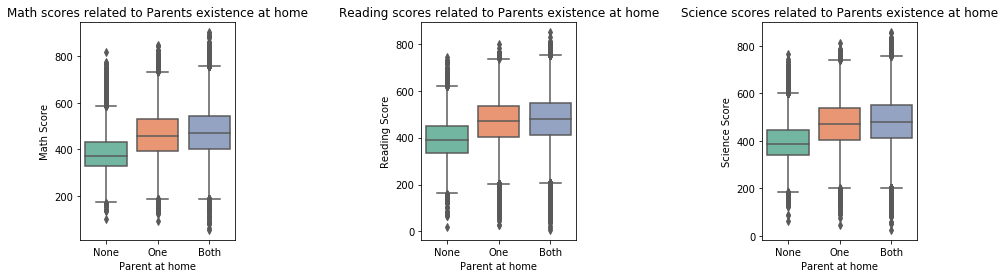

In [18]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)
order = ['None', 'One', 'Both']


plt.subplot(1, 3, 1)
sb.boxplot(x = df['Parent at home'], y = df['Math Score'], palette = 'Set2', order=order)
plt.title('Math scores related to Parents existence at home');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Parent at home'], y = df['Reading Score'], palette = 'Set2',order=order)
plt.title('Reading scores related to Parents existence at home');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Parent at home'], y = df['Science Score'], palette = 'Set2', order=order);
plt.title('Science scores related to Parents existence at home');

## (Top 10 countries with the exceptional students)



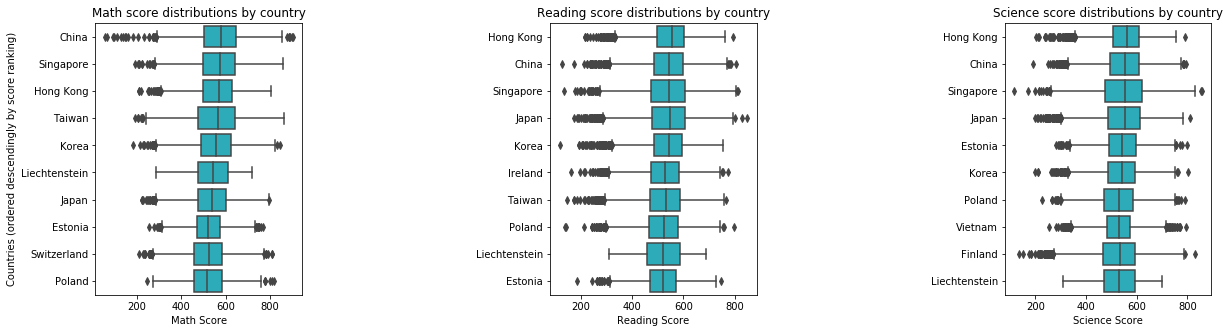

In [19]:
plt.figure(figsize = [20, 5])
plt.subplots_adjust(wspace = 1.2) # adjust spacing between subplots, in order to show long country names nicely

math_score_country_order = df.groupby('Country')['Math Score'].mean().sort_values(ascending = False).index[:10]
reading_score_country_order = df.groupby('Country')['Reading Score'].mean().sort_values(ascending = False).index[:10]
science_score_country_order = df.groupby('Country')['Science Score'].mean().sort_values(ascending = False).index[:10]

plt.subplot(1, 3, 1)
sb.boxplot(x = df['Math Score'], y = df['Country'], order = math_score_country_order, color = sb.color_palette()[9]);
plt.ylabel('Countries (ordered descendingly by score ranking)')
plt.title('Math score distributions by country');

plt.subplot(1, 3, 2)
sb.boxplot(x = df['Reading Score'], y = df['Country'], order = reading_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Reading score distributions by country');

plt.subplot(1, 3, 3)
sb.boxplot(x = df['Science Score'], y = df['Country'], order = science_score_country_order, color = sb.color_palette()[9]);
plt.ylabel(''); # Remove the redundant label
plt.title('Science score distributions by country');


## (Family country combination)



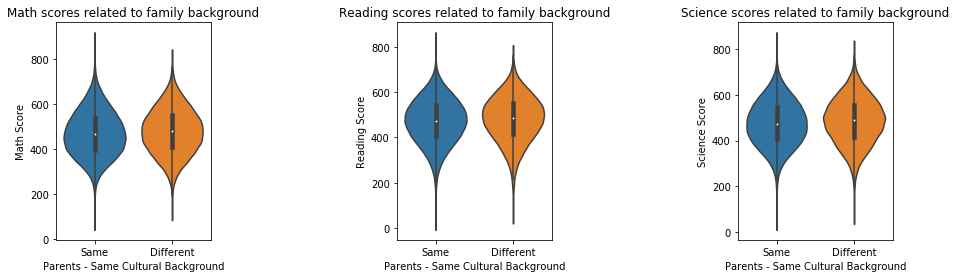

In [20]:
plt.figure(figsize = [15, 4])
plt.subplots_adjust(wspace = 1.2)

plt.subplot(1, 3, 1)
sb.violinplot(x = df['Parents - Same Cultural Background'], y = df['Math Score'])
plt.title('Math scores related to family background');

plt.subplot(1, 3, 2)
sb.violinplot(x = df['Parents - Same Cultural Background'], y = df['Reading Score'])
plt.title('Reading scores related to family background');

plt.subplot(1, 3, 3)
sb.violinplot(x = df['Parents - Same Cultural Background'], y = df['Science Score']);
plt.title('Science scores related to family background');

In general, students' learning is closely related to each subject. From the following correlation diagram, it can be seen that there is a high positive correlation between different subjects.



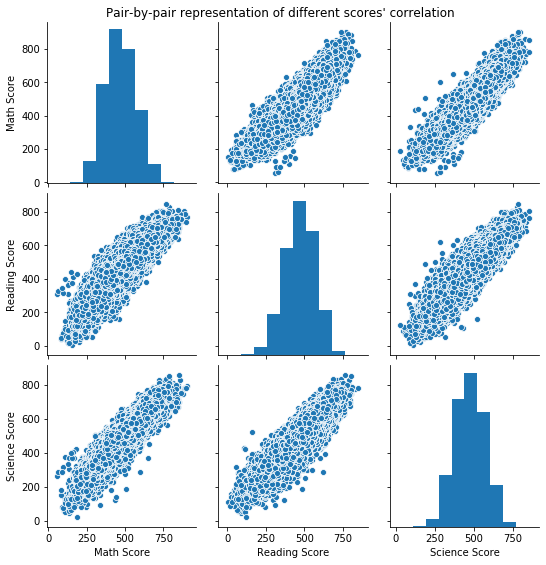

In [21]:
grid = sb.pairplot(data = df, vars=["Math Score", "Reading Score", "Science Score"]);
grid.fig.suptitle("Pair-by-pair representation of different scores' correlation", y = 1.02);


## Conclusions


Exploring from the original problem, we got several conclusions as follows:

Students with their parents will have better study
The performance of girls in reading is better than that of boys. But the performance of boys in mathematics and science is better.
In the PISA test, the scores of Asian countries seem to be slightly higher.
Finally, there is a very strong and positive correlation between any pair of the three variables representing the score of the three subjects.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!